In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics


plt.style.use('dark_background')
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [3]:
# обращаем столбцы тииа object в бинарные
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data = df.copy()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encoder.fit_transform(data[col])
data.head()
data

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,1,1,2,0,0,2947,1603.0,10,360,1,2,0
610,525,1,0,0,0,0,4680,2087.0,15,360,1,1,0
611,551,1,1,2,0,1,6633,0.0,25,360,0,0,0
612,552,1,1,1,1,0,2492,2375.0,30,360,1,0,1


In [4]:
# распределение по классу Loan_Status
data['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


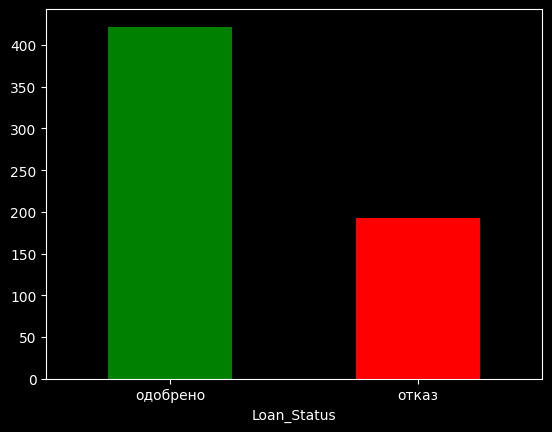

In [5]:
data['Loan_Status'].value_counts().plot.bar(color=['green','red'])
plt.xticks([0,1], ['одобрено', 'отказ'], rotation=0)
plt.show()


In [14]:
#  предсказываем y по классу 'Loan_Status' выдадут кредит или нет
#  выбрали несколько переменных и разделили выборку на train/test
x = data.drop(['Loan_Status', 'Customer_ID'], axis=1).values
y = data['Loan_Status'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=24, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape



((460, 11), (154, 11), (460,), (154,))

In [15]:

print(y_train.mean())
print(y_test.mean())

0.6869565217391305
0.6883116883116883


In [16]:
#стандартизация переменных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[ 0.4692112 ,  0.73029674, -0.69070169, ..., -2.10191301,
        -2.24780595, -1.36658231],
       [ 0.4692112 ,  0.73029674,  0.93447876, ...,  0.31811031,
         0.44487826, -0.0888834 ],
       [-2.13123642,  0.73029674,  0.12188853, ..., -3.39259211,
         0.44487826, -0.0888834 ],
       ...,
       [ 0.4692112 ,  0.73029674, -0.69070169, ...,  0.31811031,
         0.44487826,  1.18881551],
       [ 0.4692112 , -1.36930639, -0.69070169, ...,  0.31811031,
         0.44487826, -0.0888834 ],
       [ 0.4692112 ,  0.73029674, -0.69070169, ..., -2.10191301,
         0.44487826, -1.36658231]])

In [17]:
#обучение модели на трех переменных
from sklearn.neighbors import KNeighborsClassifier
K=3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
#предсказание на тестовой выборке
x_test_scaled=scaler.transform(x_test)
y_pred = clf.predict(x_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [19]:
#матрица ошибок из sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 32],
       [13, 93]])

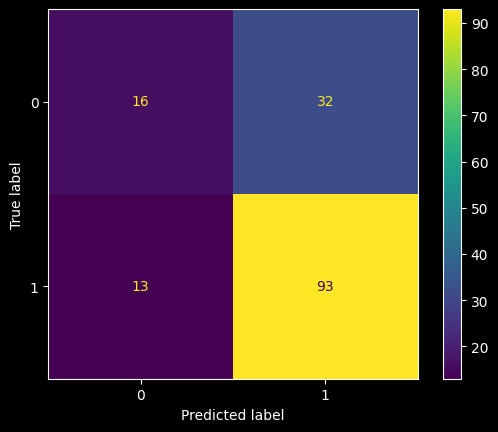

In [20]:
#матрица ошибок графиком
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()


In [21]:
#метрики качества
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy',accuracy_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred))
print('recall',recall_score(y_test, y_pred))
print('f1',accuracy_score(y_test, y_pred))

accuracy 0.7077922077922078
precision 0.744
recall 0.8773584905660378
f1 0.7077922077922078


In [24]:
for i in range(3, 13, 2):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(x_train_scaled, y_train)
  y_pred = clf.predict(x_test_scaled)
  print('Neighbors', i,
        'Precision', np.round(precision_score(y_test, y_pred),3),
        'recall', np.round(recall_score(y_test, y_pred),3)
        )

Neighbors 3 Precision 0.744 recall 0.877
Neighbors 5 Precision 0.756 recall 0.934
Neighbors 7 Precision 0.756 recall 0.962
Neighbors 9 Precision 0.757 recall 0.972
Neighbors 11 Precision 0.761 recall 0.991


K = 7 оптимален